#### 1. **Write an Introduction**
   - **Start your analysis by writing an introduction** in an empty jupyter notebook.  The introduction will provide context for the data on superheroes that you are analyzing. The introduction should include:
     - **A brief description of the dataset:** Mention that you are analyzing a superhero dataset and provide a source if known (e.g., "This cleaned_superhero_dataset.csv file was provided as part of a Data Analysis exercise, is originally from Kaggle, and contains information about various superheroes, including their origins and publishers.").
     - **3-5 key questions or hypotheses** you aim to explore in the analysis. For example, you may work towards answering the following:
    1. Which publishers have introduced the most superheroes?
        This question examines which publishers (e.g., Marvel, DC) have the highest count of superheroes in the dataset.
    2. How are superheroes distributed across different origins?
        This question looks at the distribution of superheroes based on their origin (e.g., alien, human, mutant) across the entire dataset.
    3. Do major publishers focus on certain origins more than independent publishers?
        This question compares the origins of superheroes between major and independent publishers to determine if there is a significant difference in the types of origins they introduce.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [12]:
df = pd.read_csv('../data/highest-female-artist-gross-concert.csv')
df.rename(lambda col: col.replace('\xa0', ' '), axis='columns', inplace=True) 
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [20]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


,Rank,Shows
count,20.000000,20.000000
mean,10.450000,110.000000
std,5.942488,66.507617
min,1.000000,41.000000
25%,5.750000,59.000000
50%,10.500000,87.000000
75%,15.250000,134.500000
max,20.000000,325.000000


In [21]:
df.columns

Index(['Rank', 'Peak', 'All Time Peak', 'Actual gross',
       'Adjusted gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)',
       'Shows', 'Average gross', 'Ref.'],
      dtype='object')

In [ ]:
df[['Actual gross', 'Adjusted gross (in 2022 dollars)', 'Average gross']].value_counts()
df['Actual gross'] = df['Actual gross'].replace({r'\$':'', r',':'', r'\[.*?\]':''}, regex=True).astype(float)
df['Adjusted gross (in 2022 dollars)'] = df['Adjusted gross (in 2022 dollars)'].replace({r'\$': '', r',': '', r'\[.*?\]': ''}, regex=True).astype(float)
df['Average gross'] = df['Average gross'].replace({r'\$': '', r',': '', r'\[.*?\]': ''}, regex=True).astype(float)


In [37]:
df[['Actual gross', 'Adjusted gross (in 2022 dollars)', 'Average gross']].head()

,Actual gross,Adjusted gross (in 2022 dollars),Average gross
0,780000000.0,780000000.0,13928571.0
1,579800000.0,579800000.0,10353571.0
2,411000000.0,560622615.0,4835294.0
3,397300000.0,454751555.0,2546795.0
4,345675146.0,402844849.0,6522173.0


In [51]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Peak             11
All Time Peak    14
dtype: int64


In [55]:
df['Peak'] = df['Peak'].fillna('Unknown')
df['All Time Peak'] = df['All Time Peak'].fillna('Unknown')

In [57]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000.0,780000000.0,Taylor Swift,The Eras Tour †,2023–2024,56,13928571.0,[1]
1,2,1,7[2],579800000.0,579800000.0,Beyoncé,Renaissance World Tour,2023,56,10353571.0,[3]
2,3,1[4],2[5],411000000.0,560622615.0,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294.0,[6]
3,4,2[7],10[7],397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795.0,[7]
4,5,2[4],Unknown,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,2018,53,6522173.0,[8]


In [60]:
df['Artist'] = df['Artist'].str.lower()
df['Artist'].unique

<bound method Series.unique of 0     taylor swift
1          beyoncé
2          madonna
3             pink
4     taylor swift
5          madonna
6      celine dion
7             pink
8          beyoncé
9     taylor swift
10         beyoncé
11       lady gaga
12      katy perry
13            cher
14         madonna
15            pink
16       lady gaga
17         madonna
18           adele
19    taylor swift
Name: Artist, dtype: object>

In [67]:
df['Year'] = df['Year(s)'].str.split('–').str[0].astype(int)

# Check the transformed Year column
df[['Year(s)', 'Year']].head()
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.,Year
0,1,1,2,780000000.0,780000000.0,taylor swift,The Eras Tour †,2023–2024,56,13928571.0,[1],2023
1,2,1,7[2],579800000.0,579800000.0,beyoncé,Renaissance World Tour,2023,56,10353571.0,[3],2023
2,3,1[4],2[5],411000000.0,560622615.0,madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294.0,[6],2008
3,4,2[7],10[7],397300000.0,454751555.0,pink,Beautiful Trauma World Tour,2018–2019,156,2546795.0,[7],2018
4,5,2[4],Unknown,345675146.0,402844849.0,taylor swift,Reputation Stadium Tour,2018,53,6522173.0,[8],2018


In [69]:
df.to_csv('cleandata.csv')

In [72]:
df.head(20)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.,Year
0,1,1,2,780000000.0,780000000.0,taylor swift,The Eras Tour †,2023–2024,56,13928571.0,[1],2023
1,2,1,7[2],579800000.0,579800000.0,beyoncé,Renaissance World Tour,2023,56,10353571.0,[3],2023
2,3,1[4],2[5],411000000.0,560622615.0,madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294.0,[6],2008
3,4,2[7],10[7],397300000.0,454751555.0,pink,Beautiful Trauma World Tour,2018–2019,156,2546795.0,[7],2018
4,5,2[4],Unknown,345675146.0,402844849.0,taylor swift,Reputation Stadium Tour,2018,53,6522173.0,[8],2018
5,6,2[4],10[9],305158363.0,388978496.0,madonna,The MDNA Tour,2012,88,3467709.0,[9],2012
6,7,2[10],Unknown,280000000.0,381932682.0,celine dion,Taking Chances World Tour,2008–2009,131,2137405.0,[11],2008
7,7,Unknown,Unknown,257600000.0,257600000.0,pink,Summer Carnival †,2023–2024,41,6282927.0,[12],2023
8,9,Unknown,Unknown,256084556.0,312258401.0,beyoncé,The Formation World Tour,2016,49,5226215.0,[13],2016
9,10,Unknown,Unknown,250400000.0,309141878.0,taylor swift,The 1989 World Tour,2015,85,2945882.0,[14],2015


/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_78295/199320193.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


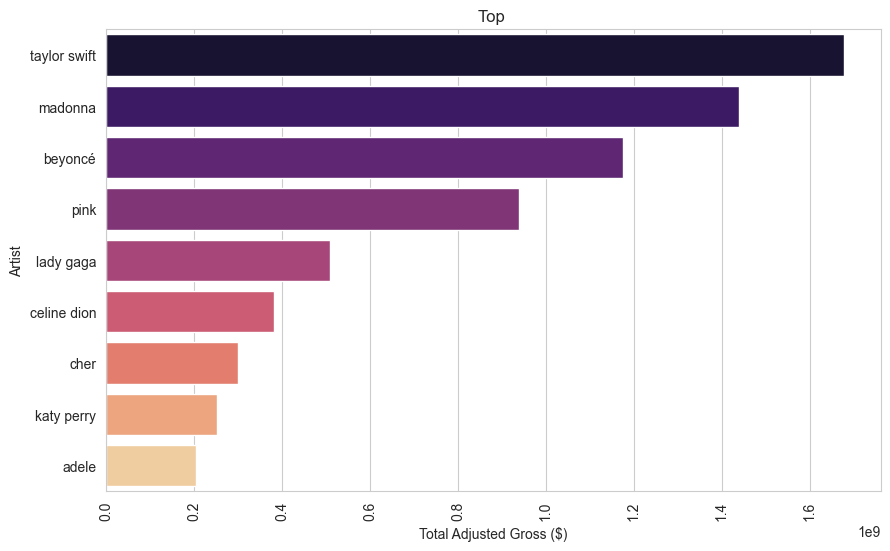

In [82]:
top_artists = df.groupby('Artist')['Adjusted gross (in 2022 dollars)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.xticks(rotation=90)
plt.title('Top ')
plt.xlabel('Total Adjusted Gross ($)')
plt.ylabel('Artist')
plt.show()

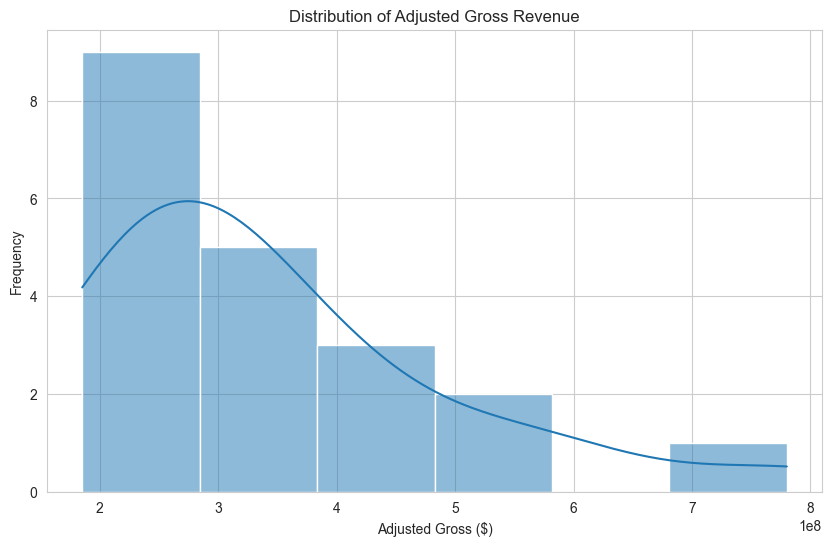

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.,Year
0,1,1,2,780000000.0,780000000.0,taylor swift,The Eras Tour †,2023–2024,56,13928571.0,[1],2023
1,2,1,7[2],579800000.0,579800000.0,beyoncé,Renaissance World Tour,2023,56,10353571.0,[3],2023
2,3,1[4],2[5],411000000.0,560622615.0,madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294.0,[6],2008
3,4,2[7],10[7],397300000.0,454751555.0,pink,Beautiful Trauma World Tour,2018–2019,156,2546795.0,[7],2018
4,5,2[4],Unknown,345675146.0,402844849.0,taylor swift,Reputation Stadium Tour,2018,53,6522173.0,[8],2018


In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Adjusted gross (in 2022 dollars)'], kde=True)
plt.title('Distribution of Adjusted Gross Revenue')
plt.xlabel('Adjusted Gross ($)')
plt.ylabel('Frequency')
plt.show()
df.head()

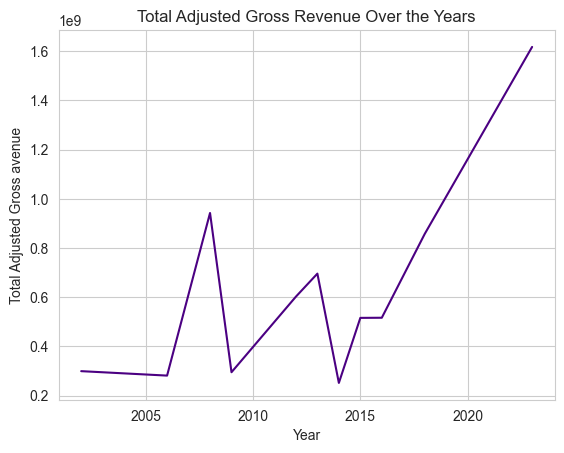

In [94]:
yearly_revenue = df.groupby('Year')['Adjusted gross (in 2022 dollars)'].sum()
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, color='indigo')
plt.title('Total Adjusted Gross Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Adjusted Gross avenue')
plt.show()

/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_78295/2360746906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_adjusted_revenue_by_artist.values, y=avg_adjusted_revenue_by_artist.index, palette='magma')


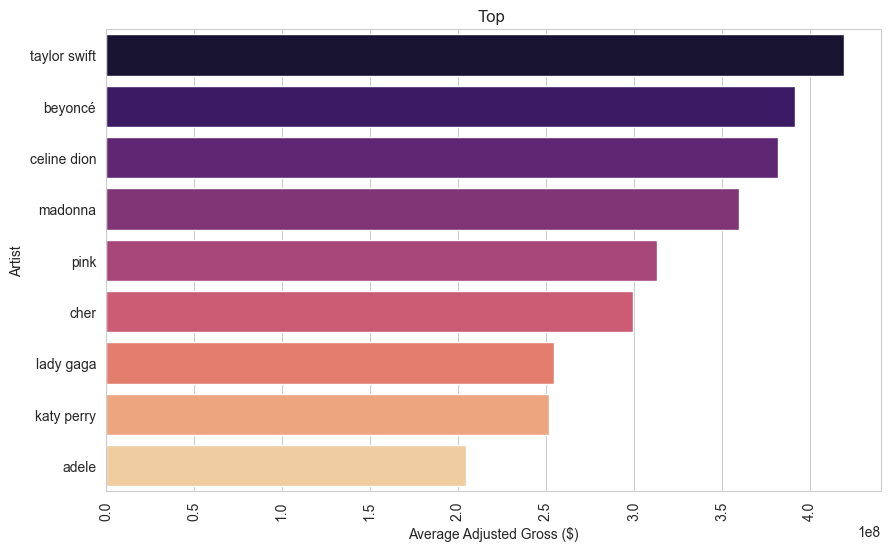

Artist
taylor swift    4.193525e+08
beyoncé         3.917538e+08
celine dion     3.819327e+08
madonna         3.595662e+08
pink            3.132680e+08
cher            2.996763e+08
lady gaga       2.544350e+08
katy perry      2.518568e+08
adele           2.044861e+08
Name: Adjusted gross (in 2022 dollars), dtype: float64

In [99]:
avg_adjusted_revenue_by_artist = df.groupby('Artist')['Adjusted gross (in 2022 dollars)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_adjusted_revenue_by_artist.values, y=avg_adjusted_revenue_by_artist.index, palette='magma')
plt.xticks(rotation=90)
plt.title('Top ')
plt.xlabel('Average Adjusted Gross ($)')
plt.ylabel('Artist')
plt.show()

avg_adjusted_revenue_by_artist

# Conclusion

This analysis revealed that Taylor Swift tops the list as the highest grossing female concert artist, followed by Beyoncé, Celine Dion, and Madonna

# Suggestions for Future Analysis

    - Examine impact of show count on revenue.

    - Compare with male artists' data.

    - Track revenue trends over time.

In [100]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.,Year
0,1,1,2,780000000.0,780000000.0,taylor swift,The Eras Tour †,2023–2024,56,13928571.0,[1],2023
1,2,1,7[2],579800000.0,579800000.0,beyoncé,Renaissance World Tour,2023,56,10353571.0,[3],2023
2,3,1[4],2[5],411000000.0,560622615.0,madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294.0,[6],2008
3,4,2[7],10[7],397300000.0,454751555.0,pink,Beautiful Trauma World Tour,2018–2019,156,2546795.0,[7],2018
4,5,2[4],Unknown,345675146.0,402844849.0,taylor swift,Reputation Stadium Tour,2018,53,6522173.0,[8],2018
